# PLOTS

Code used to produce plots showing distances between groups of documents from both kinds of BERT representation (BERT and Legal BERT) and the TF-IDF representation.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations



In [2]:
# Functions to calculate complete list of pairwise distances from a categorical group of documents (internal and external)
def internal_pairwise_distances_from_data_column(column, distance_matrix, data_ref):
    categories = data_ref[column].unique()
    distance_dict = {
        "category": [],
        "distance": []
    }
    for category in categories:
        category_indexes = data_ref[data_ref[column] == category].sort_index().index
        for c in combinations(category_indexes, 2):
            distance_dict["category"].append(category)
            distance_dict["distance"].append(distance_matrix[str(c[0])].loc[c[1]])
    return pd.DataFrame(distance_dict)

def external_pairwise_distances_from_data_column(column, distance_matrix, data_ref):
    categories = data_ref[column].unique()
    distance_dict = {
        "category": [],
        "distance": []
    }
    for category in categories:
        category_indexes = data_ref[data_ref[column] == category].sort_index().index
        non_category_indexes = data_ref[data_ref[column] != category].sort_index().index
        for c in category_indexes:
            for nc in non_category_indexes:
                distance_dict["category"].append(category)
                distance_dict["distance"].append(distance_matrix[str(c)].loc[nc])
    return pd.DataFrame(distance_dict)

def pairwise_distances_from_data_column(column, distance_matrix, data_ref):
    df_internal_distances=internal_pairwise_distances_from_data_column(column, distance_matrix, data_ref)
    df_internal_distances["distance_type"] = "Internal Distance"
    df_external_distances=external_pairwise_distances_from_data_column(column, distance_matrix, data_ref)
    df_external_distances["distance_type"] = "External Distance"
    df_distances = pd.concat([df_internal_distances, df_external_distances], ignore_index=True)
    return df_distances

In [3]:
# Plot aesthetics preparation
## choose a color palette
distance_palette = {
    "Internal Distance": "steelblue",
    "External Distance": "indianred"
}

## set axis lines to light gray
plt.rcParams["axes.edgecolor"] = "lightgray"
## tick labels to dark gray
plt.rcParams["ytick.color"] = "dimgrey"
plt.rcParams["xtick.color"] = "dimgrey"

## set grid on
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.color"] = "lightgray"
## line below
plt.rcParams["axes.axisbelow"] = True
## dashed line
plt.rcParams["grid.linestyle"] = "--"

## bold title
plt.rcParams['axes.titleweight'] = "bold"

## 1. Data

In [5]:
df_data = pd.read_csv("../data/dados.csv", index_col=0)
df_data.reset_index(inplace=True)
df_data.drop(columns=["text", "index"], inplace=True)

translate_labels = {
    "concreta": "Concrete",
    "abstrata": "Abstract"
}

df_data["labels"] = [translate_labels[l] for l in df_data["labels"]]
agency_translation_dict = {}
agency_counts = df_data["agency"].value_counts()
agency_n_order=[]
agency_order=[]

for a, v in zip(agency_counts.index, agency_counts.values):
    agency_n = a + "\n(" + str(v) + ")"
    agency_translation_dict[a] = agency_n
    agency_n_order.append(agency_n)
    agency_order.append(a)

df_data["agency_n"] = [agency_translation_dict[a] for a in df_data["agency"]]
df_data

,Unnamed: 0,publication_type,agency,labels,publication_date,agency_n
0,34.0,Autorização,ANP,Concrete,NaN,ANP\n(1375)
1,35.0,Autorização,ANP,Concrete,NaN,ANP\n(1375)
2,36.0,Autorização,ANP,Concrete,NaN,ANP\n(1375)
3,37.0,Autorização,ANP,Concrete,NaN,ANP\n(1375)
4,39.0,Autorização,ANP,Concrete,NaN,ANP\n(1375)
...,...,...,...,...,...,...
8550,NaN,Despacho,ANEEL,Concrete,2022-04-19,ANEEL\n(1339)
8551,NaN,Retificação,ANEEL,Concrete,2022-05-06,ANEEL\n(1339)
8552,NaN,Retificação,ANEEL,Concrete,2022-07-04,ANEEL\n(1339)
8553,NaN,Retificação,ANEEL,Concrete,2022-09-22,ANEEL\n(1339)


In [6]:
import pandas as pd
df_data_bert = pd.read_csv("../data/dados.csv")
df_data_bert.drop(columns=["text", "Unnamed: 0.1", "Unnamed: 0"], inplace=True)

df_data_bert["labels"] = [translate_labels[l] for l in df_data_bert["labels"]]
df_data_bert["agency_n"] = [agency_translation_dict[a] for a in df_data_bert["agency"]]
df_data_bert

,publication_type,agency,labels,publication_date,agency_n
0,Autorização,ANP,Concrete,NaN,ANP\n(1375)
1,Autorização,ANP,Concrete,NaN,ANP\n(1375)
2,Autorização,ANP,Concrete,NaN,ANP\n(1375)
3,Autorização,ANP,Concrete,NaN,ANP\n(1375)
4,Autorização,ANP,Concrete,NaN,ANP\n(1375)
...,...,...,...,...,...
8550,Despacho,ANEEL,Concrete,2022-04-19,ANEEL\n(1339)
8551,Retificação,ANEEL,Concrete,2022-05-06,ANEEL\n(1339)
8552,Retificação,ANEEL,Concrete,2022-07-04,ANEEL\n(1339)
8553,Retificação,ANEEL,Concrete,2022-09-22,ANEEL\n(1339)


In [7]:
df_data_bert = pd.read_csv("../data/dados.csv")
df_data_bert.drop(columns=["text", "Unnamed: 0.1", "Unnamed: 0"], inplace=True)

df_data_bert["labels"] = [translate_labels[l] for l in df_data_bert["labels"]]
df_data_bert["agency_n"] = [agency_translation_dict[a] for a in df_data_bert["agency"]]
df_data_bert

,publication_type,agency,labels,publication_date,agency_n
0,Autorização,ANP,Concrete,NaN,ANP\n(1375)
1,Autorização,ANP,Concrete,NaN,ANP\n(1375)
2,Autorização,ANP,Concrete,NaN,ANP\n(1375)
3,Autorização,ANP,Concrete,NaN,ANP\n(1375)
4,Autorização,ANP,Concrete,NaN,ANP\n(1375)
...,...,...,...,...,...
8550,Despacho,ANEEL,Concrete,2022-04-19,ANEEL\n(1339)
8551,Retificação,ANEEL,Concrete,2022-05-06,ANEEL\n(1339)
8552,Retificação,ANEEL,Concrete,2022-07-04,ANEEL\n(1339)
8553,Retificação,ANEEL,Concrete,2022-09-22,ANEEL\n(1339)


In [8]:
label_counts = df_data["labels"].value_counts()

label_translation_dict = {
    "Abstract": "Abstract\n(" +  str(label_counts.loc["Abstract"]) + ")",
    "Concrete": "Concrete\n(" +  str(label_counts.loc["Concrete"]) + ")"
}

df_data_bert["labels_n"] = [label_translation_dict[l] for l in df_data_bert["labels"]]
df_data["labels_n"] = [label_translation_dict[l] for l in df_data["labels"]]

In [ ]:
distances_tfidf = pd.read_csv("../data/analysis/distances_tfidf_cosine.csv", index_col=0)

In [8]:
distances_legal_bert = pd.read_csv("../data/analysis/distances_bert_cosine.csv", index_col=0)
distances_legal_bert

,0,1,2,3,4,5,6,7,8,9,...,8545,8546,8547,8548,8549,8550,8551,8552,8553,8554
0,1.788139e-07,3.546357e-03,7.733584e-03,0.012754,0.010407,0.074573,0.073986,0.005062,0.004482,0.009009,...,0.072672,0.067475,0.054282,0.061714,0.050775,0.050186,0.082944,0.074121,0.071102,8.232093e-02
1,3.546357e-03,1.192093e-07,6.797314e-03,0.010720,0.009201,0.073485,0.072157,0.004285,0.004386,0.008480,...,0.067504,0.062068,0.050870,0.056716,0.046387,0.048975,0.079342,0.071081,0.068983,7.821751e-02
2,7.733584e-03,6.797314e-03,2.384186e-07,0.016488,0.016403,0.072637,0.070225,0.004942,0.006162,0.016861,...,0.066706,0.067020,0.050099,0.054556,0.047751,0.046112,0.070170,0.067171,0.065473,7.498419e-02
3,1.275361e-02,1.072013e-02,1.648760e-02,0.000000,0.005494,0.077648,0.070265,0.012757,0.014908,0.005079,...,0.062832,0.051160,0.047710,0.054350,0.047702,0.049616,0.082769,0.070124,0.069059,7.344848e-02
4,1.040709e-02,9.200692e-03,1.640296e-02,0.005494,0.000000,0.080473,0.074898,0.013878,0.012542,0.004147,...,0.066957,0.055984,0.048973,0.055893,0.049798,0.050223,0.087967,0.072197,0.069692,7.566601e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8550,5.018586e-02,4.897493e-02,4.611230e-02,0.049616,0.050223,0.084608,0.076086,0.047535,0.047352,0.050043,...,0.044816,0.063299,0.038219,0.044769,0.047327,0.000000,0.061295,0.036759,0.037850,4.783344e-02
8551,8.294398e-02,7.934171e-02,7.016957e-02,0.082769,0.087967,0.102137,0.099060,0.070381,0.078827,0.088820,...,0.069594,0.114598,0.074599,0.080525,0.068993,0.061295,0.000000,0.073169,0.073810,8.142728e-02
8552,7.412148e-02,7.108110e-02,6.717122e-02,0.070124,0.072197,0.104720,0.084244,0.071752,0.071604,0.074387,...,0.031660,0.080910,0.024034,0.035677,0.044208,0.036759,0.073169,0.000000,0.004266,1.662272e-02
8553,7.110208e-02,6.898272e-02,6.547332e-02,0.069059,0.069692,0.099807,0.079013,0.070320,0.069190,0.071270,...,0.030149,0.076355,0.023486,0.034529,0.043060,0.037850,0.073810,0.004266,0.000000,1.774740e-02


## 2. Agency comparison

### 1.1. Agency groups (TF-IDF)

In [1]:
from pathlib import Path

Path("../data/plots/").mkdir(parents=True, exist_ok=True)

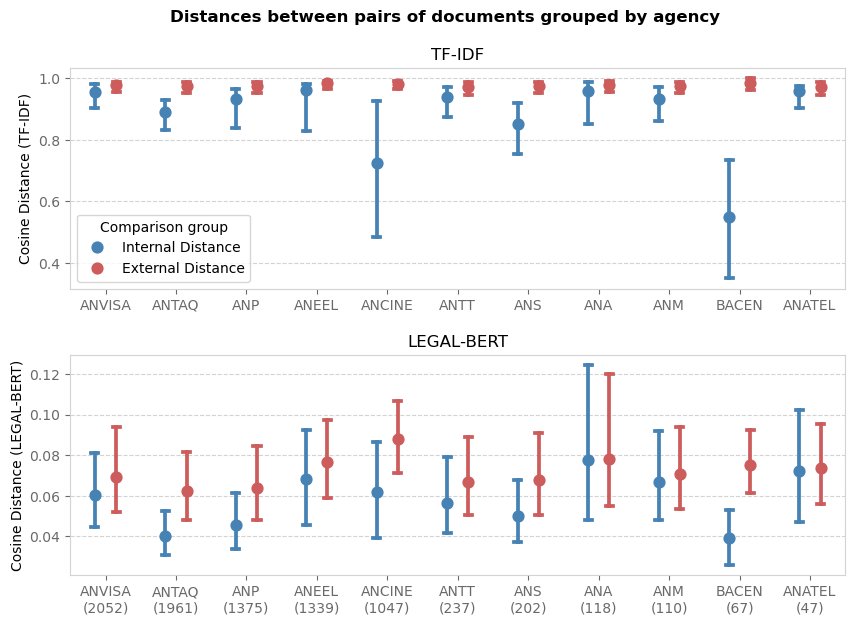

In [9]:
fig, axes = plt.subplots(2, 1, figsize=(10, 6.5))
fig.suptitle("Distances between pairs of documents grouped by agency", fontweight='bold')
plt.subplots_adjust(top=0.89, hspace=0.3)

# Calculate pairwise distances of documents per agency for TF-IDF representation
df_agency_distances_tfidf = pairwise_distances_from_data_column("agency", distances_tfidf, df_data)

# Plot data for TF-IDF representation
sns.pointplot(
    ax=axes[0],
    x="category",
    y="distance",
    hue="distance_type",
    linestyle="",
    estimator="median",
    palette=distance_palette,
    dodge=0.3,
    capsize=0.1,
    errorbar=["pi", 50],
    data=df_agency_distances_tfidf,
    order=agency_order
)
axes[0].set_title("TF-IDF", fontweight="normal")
axes[0].set_ylabel("Cosine Distance (TF-IDF)")
axes[0].set_xlabel("")
axes[0].legend(title="Comparison group", loc="lower left")

del df_agency_distances_tfidf

# Calculate pairwise distances of documents per agency for Legal BERT representation
df_agency_distances_legal_bert = pairwise_distances_from_data_column("agency_n", distances_legal_bert, df_data_bert)

# Plot data for BERT representation
sns.pointplot(
    ax=axes[1],
    x="category",
    y="distance",
    hue="distance_type",
    linestyle="",
    estimator="median",
    palette=distance_palette,
    dodge=0.3,
    capsize=0.1,
    errorbar=["pi", 50],
    data=df_agency_distances_legal_bert,
    order=agency_n_order
)
axes[1].set_title("LEGAL-BERT", fontweight="normal")
axes[1].set_ylabel("Cosine Distance (LEGAL-BERT)")
axes[1].set_xlabel("")
axes[1].get_legend().remove()

del df_agency_distances_legal_bert

plt.savefig('../data/plots/plot_agencies_cosine.pdf', dpi=450,  bbox_inches = 'tight')
plt.show()

## 3. Document type comparison

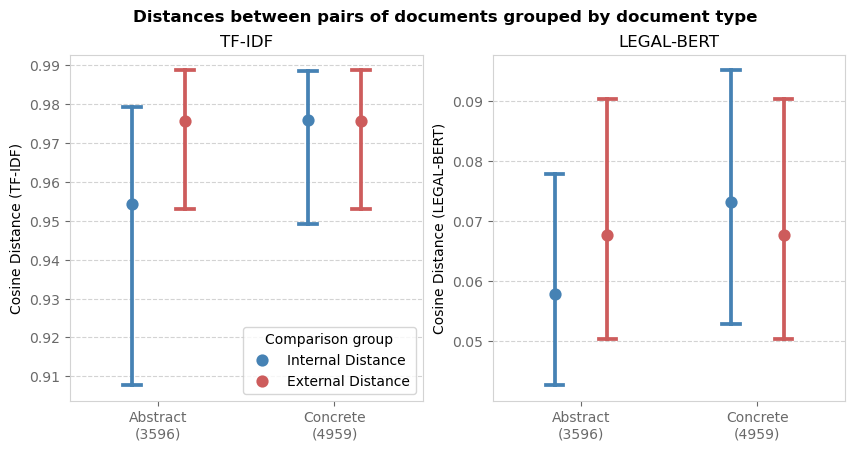

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4.5))
fig.suptitle("Distances between pairs of documents grouped by document type", fontweight='bold')

# Calculate pairwise distances of documents per agency for TF-IDF representation
df_label_distances_tfidf = pairwise_distances_from_data_column("labels_n", distances_tfidf, df_data)

# Plot data for TF-IDF representation
sns.pointplot(
    ax=axes[0],
    x="category",
    y="distance",
    hue="distance_type",
    linestyle="",
    estimator="median",
    palette=distance_palette,
    dodge=0.3,
    capsize=0.1,
    errorbar=["pi", 50],
    data=df_label_distances_tfidf,
    order=[label_translation_dict["Abstract"], label_translation_dict["Concrete"]]
)
axes[0].set_title("TF-IDF", fontweight="normal")
axes[0].set_ylabel("Cosine Distance (TF-IDF)")
axes[0].set_xlabel("")
axes[0].legend(title="Comparison group", loc="lower right")

del df_label_distances_tfidf

# Calculate pairwise distances of documents per agency for Legal BERT representation
df_label_distances_legal_bert = pairwise_distances_from_data_column("labels_n", distances_legal_bert, df_data_bert)

# Plot data for BERT representation
sns.pointplot(
    ax=axes[1],
    x="category",
    y="distance",
    hue="distance_type",
    linestyle="",
    estimator="median",
    palette=distance_palette,
    dodge=0.3,
    capsize=0.1,
    errorbar=["pi", 50],
    data=df_label_distances_legal_bert,
    order=[label_translation_dict["Abstract"], label_translation_dict["Concrete"]]
)
axes[1].set_title("LEGAL-BERT", fontweight="normal")
axes[1].set_ylabel("Cosine Distance (LEGAL-BERT)")
axes[1].set_xlabel("")
axes[1].get_legend().remove()

del df_label_distances_legal_bert

plt.savefig('../data/plots/plot_type_cosine.pdf', dpi=450,  bbox_inches = 'tight')
plt.show()